In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt

C:\Users\jishn\AppData\Local\Temp\ipykernel_32204\1554845392.py:2: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qc = QFT(


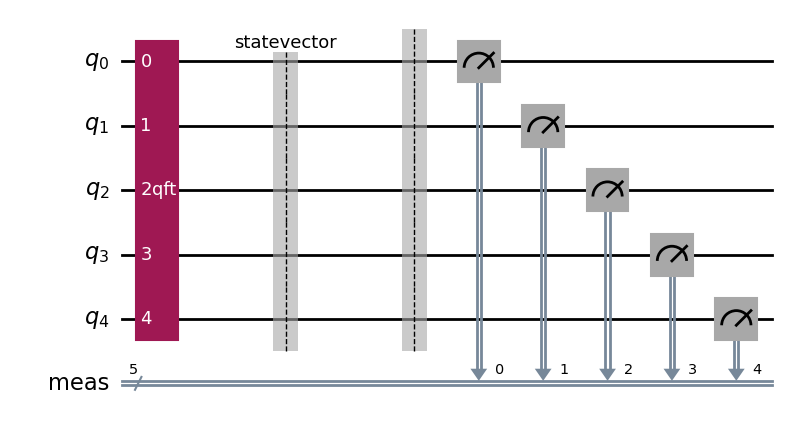


Measurement Results:


<BarContainer object of 32 artists>

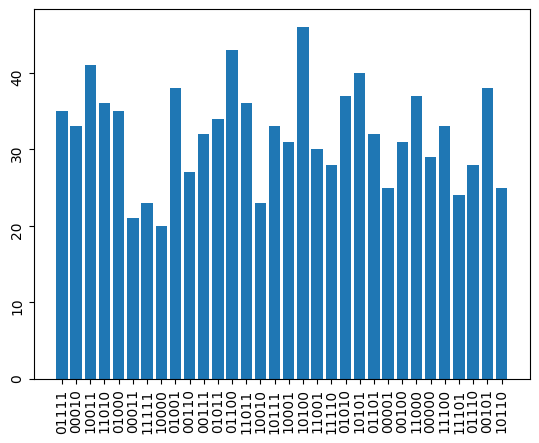

In [24]:
# Create 5-qubit QFT circuit
qc = QFT(
    num_qubits=5,
    approximation_degree=0,       # No approximation (exact QFT)
    do_swaps=True,                # Include swap gates
    inverse=False,                # Forward QFT (not inverse)
    insert_barriers=True,         # Visual separation in circuit diagram
    name='qft'                    # Circuit name
)

# Add measurement to all qubits
qc.save_statevector()  # Save statevector for later analysis
qc.measure_all()

display(qc.draw('mpl', fold=-1))  # Display circuit diagram with swaps

# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
sv = result.get_statevector()
print("\nMeasurement Results:")
plt.yticks(rotation=90) 
plt.xticks(rotation=90)
plt.bar(counts.keys(), counts.values())